In [0]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [0]:
classifier = Sequential()

In [211]:
classifier.add(Convolution2D(32,3,3,input_shape = (64,64,3),activation = 'relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [0]:

classifier.add(MaxPooling2D(pool_size = (2,2)))

In [213]:
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


In [214]:
classifier.add(Dense(output_dim = 128,activation = 'relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  """Entry point for launching an IPython kernel.


In [215]:
classifier.add(Dense(output_dim = 1,activation ='sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  """Entry point for launching an IPython kernel.


In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(
                     rescale = 1./255,
                     shear_range = 0.2,
                     zoom_range = 0.2,
                     horizontal_flip = True)

In [0]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [219]:
train = train_datagen.flow_from_directory('cell_class/train',target_size = (64,64),batch_size = 32,class_mode = 'binary')

Found 19004 images belonging to 2 classes.


In [220]:
test = test_datagen.flow_from_directory('cell_class/test',target_size = (64,64),batch_size = 32,class_mode = 'binary')

Found 4507 images belonging to 2 classes.


In [0]:
from IPython.display import display
from PIL import Image

In [222]:
#model.fit_generator(train,steps_per_epoch = 8000,epochs = 10,validation_data =test,validation_steps=800)
classifier.fit_generator(train,
                           steps_per_epoch=345,
                           epochs=10,
                           validation_data=test,
                           validation_steps=86)

Epoch 1/10
345/345 [==============================] - 103s 298ms/step - loss: 0.5770 - acc: 0.6831 - val_loss: 0.3167 - val_acc: 0.9092
Epoch 2/10
345/345 [==============================] - 100s 289ms/step - loss: 0.2837 - acc: 0.8896 - val_loss: 0.3558 - val_acc: 0.8569
Epoch 3/10
345/345 [==============================] - 100s 288ms/step - loss: 0.2342 - acc: 0.9106 - val_loss: 0.2195 - val_acc: 0.9331
Epoch 4/10
345/345 [==============================] - 99s 287ms/step - loss: 0.1908 - acc: 0.9297 - val_loss: 0.3564 - val_acc: 0.8915
Epoch 5/10
345/345 [==============================] - 98s 285ms/step - loss: 0.1858 - acc: 0.9334 - val_loss: 0.3123 - val_acc: 0.9050
Epoch 6/10
345/345 [==============================] - 99s 286ms/step - loss: 0.1791 - acc: 0.9385 - val_loss: 0.3238 - val_acc: 0.9095
Epoch 7/10
345/345 [==============================] - 99s 288ms/step - loss: 0.1664 - acc: 0.9432 - val_loss: 0.4334 - val_acc: 0.8941
Epoch 8/10
345/345 [==============================] 

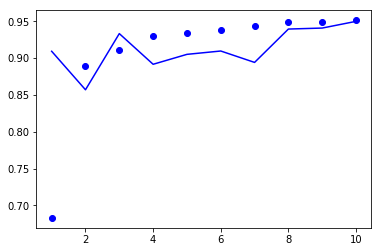

<Figure size 432x288 with 0 Axes>

In [226]:
hist = classifier.history.history
hist.keys()
val_acc=hist['val_acc']
val_loss=hist['val_loss']
acc=hist['acc']
loss=hist['loss']
import matplotlib.pyplot as plt
%matplotlib inline
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training_Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation_Accuracy')
plt.figure()
plt.show()

In [227]:
hist['acc']


[0.6830615942028986,
 0.8896339253568701,
 0.9105978260869565,
 0.9296846684013081,
 0.9334239130434783,
 0.938474084748527,
 0.943185936976879,
 0.9489130434782609,
 0.9490757521272959,
 0.951268115942029]

In [228]:
hist['val_acc']

[0.909156976744186,
 0.8569348379183042,
 0.9331395348837209,
 0.8915180197229028,
 0.9049872588278122,
 0.9095203488372093,
 0.8940662539434902,
 0.9393168604651163,
 0.9406625409537678,
 0.9497633784477781]

In [229]:

hist['val_loss']


[0.31672624862471294,
 0.35581656447488,
 0.21952012759568387,
 0.3563506678207857,
 0.3123221700210267,
 0.32376580486117407,
 0.43339931839025364,
 0.26178440823068105,
 0.23339212640867718,
 0.19385334772058171]

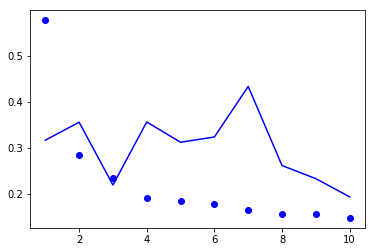

In [230]:
plt.plot(epochs,loss,'bo',label='Training_Loss')
plt.plot(epochs,val_loss,'b',label='Validation_Loss')
plt.show()


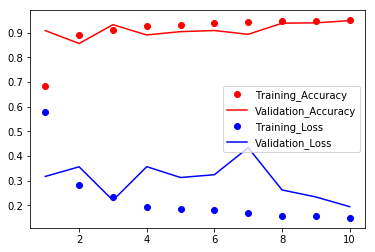

In [231]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training_Accuracy',color='r')
plt.plot(epochs,val_acc,'b',label='Validation_Accuracy',color='r')
plt.plot(epochs,loss,'bo',label='Training_Loss')
plt.plot(epochs,val_loss,'b',label='Validation_Loss')
plt.legend()
plt.show()
